In [1]:
import os
import numpy as np
import cv2
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from skimage.restoration import estimate_sigma
from sklearn.cluster import KMeans
import json

**PATHS**

In [3]:
image_path     = '../../../dataset/images'
training_path  = os.path.join(image_path, 'training')
original_path  = os.path.join(training_path, 'original')

**LISTAS DE IMAGENES**

In [4]:
original  = [os.path.join(original_path, image) for image in os.listdir(original_path)]

**RANGOS DE COLOR**

In [5]:
lower_green = np.array([28, 40, 40])
upper_green = np.array([100, 255, 255])

lower_red_1 = np.array([0, 120, 100])
upper_red_1 = np.array([5, 255, 255])

lower_red_2 = np.array([170, 120, 100])
upper_red_2 = np.array([179, 255, 255])

lower_yellow = np.array([18, 50, 80])
upper_yellow = np.array([33, 255, 255])

lower_orange = np.array([5, 120, 90])
upper_orange = np.array([20, 255, 255])

**MASCARAS**
- Se invierte demasiado tiempo en la ejecución del filtro de eliminación del ruido.

In [ ]:
for k, file in enumerate(original):
    # BGR image
    image = cv2.imread(file)

    # Gray scale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Standard deviation estimated
    sigma_est  = estimate_sigma(gray_image)

    # Non local means noise filter
    #image = cv2.fastNlMeansDenoising(image, None, h = 2*sigma_est, templateWindowSize = 5, searchWindowSize = 50)
    height, width, _ = image.shape
    

    # Recalculate Gray Scale from denoised image
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #_, mask_gray = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Gray Scale mask
    #mask_gray = np.uint8(mask_gray)
 
    # Pixel data vector
    data_vector = np.zeros((height * width, 8))  # 3 for RGB, 3 for HSV, 3 for LAB, 1 for gray scale

    # Rellenar el vector con los valores de cada píxel
    '''for i in range(height):
        for j in range(width):
            pixel = image[i, j]

            # RGB
            data_vector[i * width + j, :3] = pixel

            # HSV
            hsv_pixel = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2HSV)[0, 0]
            data_vector[i * width + j, 3:5] = hsv_pixel[1:]

            # LAB
            lab_pixel = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2LAB)[0, 0]
            data_vector[i * width + j, 5:7] = lab_pixel[1:]

            # Escala de grises
            data_vector[i * width + j, 7] = cv2.cvtColor(np.array([[pixel]], dtype=np.uint8), cv2.COLOR_RGB2GRAY)[0, 0]'''

    # Obtener matrices de color
    rgb_matrix = image.reshape((-1, 3))
    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))
    gray_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).reshape((-1, 1))

    # Asignar a la matriz de datos
    data_vector[:, :3] = rgb_matrix
    data_vector[:, 3:5] = hsv_matrix[:, 1:]
    data_vector[:, 5:7] = lab_matrix[:, 1:]
    data_vector[:, 7] = gray_matrix[:, 0]

    kmeans = KMeans(n_clusters = 2)  # 2 Clusters. Background and fruit
    kmeans.fit(data_vector)

    # Get clusters labels
    labels = kmeans.labels_

    # kmeans_mask
    kmeans_mask = labels.reshape(height, width)
    kmeans_mask = kmeans_mask.astype(np.uint8) * 255

    # BGR to HSV form denoised image
    '''hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    l, a, b = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))'''

    # Masks obtained with otsu from hech channel from denoised image
    # _, mask_h = cv2.threshold(h, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_l = cv2.threshold(l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_a = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Color masks
    '''mask_red    = cv2.inRange(hsv_image, lower_red_1, upper_red_1) | cv2.inRange(hsv_image, lower_red_2, upper_red_2)
    mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
    mask_green  = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)'''

    # Whole color mask
    #combined_mask = mask_red | mask_orange | mask_green | mask_yellow

    #contours
    #color
    '''sobel_x = cv2.Sobel(combined_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(combined_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, colorWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    # kmeans
    sobel_x = cv2.Sobel(kmeans_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(kmeans_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # gray
    '''sobel_x = cv2.Sobel(mask_gray, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_gray, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, grayWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # h
    #sobel_x = cv2.Sobel(mask_h, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_h, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    #_, hWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # s
    sobel_x = cv2.Sobel(mask_s, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_s, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, sWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    # v
    #sobel_x = cv2.Sobel(mask_v, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_v, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    #magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    #_, vWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # l
    #sobel_x = cv2.Sobel(mask_l, cv2.CV_64F, 1, 0, ksize=9)
    #sobel_y = cv2.Sobel(mask_l, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    #magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    #magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    #magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    '''_, lWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # b
    sobel_x = cv2.Sobel(mask_b, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_b, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, bWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # a
    sobel_x = cv2.Sobel(mask_a, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_a, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, aWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    # Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #color_cnt, _ = cv2.findContours(colorWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #gray_cnt, _ = cv2.findContours(grayWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #h_cnt, _ = cv2.findContours(hWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #s_cnt, _ = cv2.findContours(sWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #v_cnt, _ = cv2.findContours(vWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #l_cnt, _ = cv2.findContours(lWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #b_cnt, _ = cv2.findContours(bWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #a_cnt, _ = cv2.findContours(aWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar contornos
    # templates
    #tcolor = np.zeros((height, width), dtype=np.uint8)
    tkmeans = np.zeros((height, width), dtype=np.uint8)
    #tgray = np.zeros((height, width), dtype=np.uint8)
    #th = np.zeros((height, width), dtype=np.uint8)
    #ts = np.zeros((height, width), dtype=np.uint8)
    #tv = np.zeros((height, width), dtype=np.uint8)
    #tl = np.zeros((height, width), dtype=np.uint8)
    #tb = np.zeros((height, width), dtype=np.uint8)
    #ta = np.zeros((height, width), dtype=np.uint8)

    # dibujar
    #cv2.drawContours(tcolor, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tkmeans, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tgray, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(th, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(ts, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tv, v_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tl, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tb, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(ta, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    # superposición
    #whole = np.zeros((height, width), dtype=np.uint8)
    #cv2.drawContours(whole, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, v_cnt, -1,255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    # plotting
    plt.figure(figsize =(4,4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    '''plt.subplot(1, 7, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('color')'''
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_mask, cmap='gray')
    plt.title('kmeans')
    '''plt.subplot(1, 7, 4)
    plt.imshow(mask_gray, cmap='gray')
    plt.title('gray_umbral')'''
    #plt.subplot(1, 10, 5)
    #plt.imshow(mask_h, cmap='gray')
    #plt.title('h')
    '''plt.subplot(1, 7, 5)
    plt.imshow(mask_s, cmap='gray')
    plt.title('s')'''
    #plt.subplot(1, 10, 7)
    #plt.imshow(mask_v, cmap='gray')
    #plt.title('v')
    #plt.subplot(1, 10, 8)
    #plt.imshow(mask_l, cmap='gray')
    #plt.title('l')
    '''plt.subplot(1, 7, 6)
    plt.imshow(mask_b, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 7)
    plt.imshow(mask_a, cmap='gray')
    plt.title('a')'''
    #plt.show()

    #plt.figure(figsize =(4,4))
    '''plt.subplot(1, 7, 1)
    plt.imshow(tcolor, cmap='gray')
    plt.title('color')'''
    plt.subplot(1, 3, 3)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('kmeans')
    '''
    plt.subplot(1, 7, 3)
    plt.imshow(tgray, cmap='gray')
    plt.title('gray_umbral')
    #plt.subplot(1, 10, 4)
    #plt.imshow(th, cmap='gray')
    #plt.title('h')
    plt.subplot(1, 7, 4)
    plt.imshow(ts, cmap='gray')
    plt.title('s')
    #plt.subplot(1, 10, 6)
    #plt.imshow(tv, cmap='gray')
    #plt.title('v')
    #plt.subplot(1, 10, 7)
    #plt.imshow(tl, cmap='gray')
    #plt.title('l')
    plt.subplot(1, 7, 5)
    plt.imshow(tb, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 6)
    plt.imshow(ta, cmap='gray')
    plt.title('a')
    plt.subplot(1, 7, 7)
    plt.imshow(whole, cmap='gray')
    plt.title('whole')'''
    plt.show()

**Las máscaras que teníamos en el test1**
- Se puede observar que la máscara que se obtiene con la escala de grises y la máscara que se obtiene con L de LAB son esencialmente las mismas. Con lo cual no tiene sentido conservar las dos
- La eliminación del filtro de suavizado de ruido de la imágen no produce empeoramientos apreciables sobre la separación con lo cual conviene mas que conservarlo dado que insume mucho tiempo
- La máscara de v puede ayudar pero es muy propensa a las sombras de la imagen. En general se parece a la másca de l
- La máscara de S y la máscara de B son muy parecidas, en algunos casos capaz que la máscara de S es mejor. Y lo mejor de todo, es que las dos son bastante insensibles a las sombras.
- La máscara a parece ser bastante inerte y no ayudar demasiado excepto cuando se trata de las peras. En esos casos parece ser la mejor de las máscaras. En cambio en otros casos cuando es buena, la máscara B también lo es o es muy parecida a la máscara de l. En realidad pareciera que la máscara a funciona bien con las peras, las naranjas y las manzanas, siendo mejor con las manzanas y naranjas que con las peras y horrible con las bananas
- La escala de Hue, en la mayoria de los casos no funciona


Teniendo en cuenta esto vamos a probar a hacer lo siguiente:
- Quedarnos con la escala de grises y sacar la escala l o bien, quedarnos con la escala l y sacar la escala de gries
- Vamos a sacar la escala de hue
- Vamos a quedarnos con la escala de color, la escala de grises, el kmeans, el s, el b y el a. El s y b, aunque sean muy parecidos los conservamos porque son ligeramente distintos y pueden contribuir a un mejor resultado las variaciones entre los dos.
- El kmeans lo vamos a utilizar con las propiedades que conservamos solamente


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


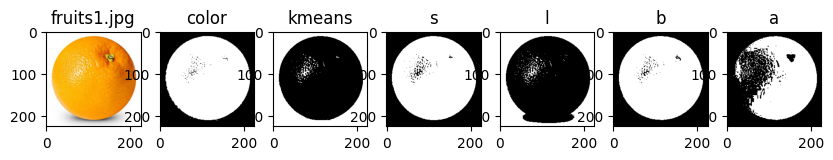

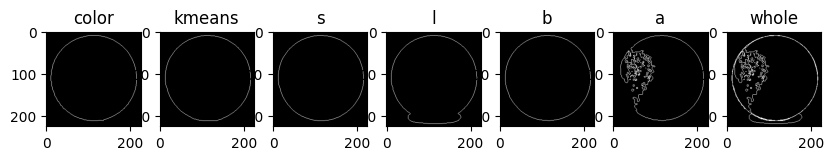

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


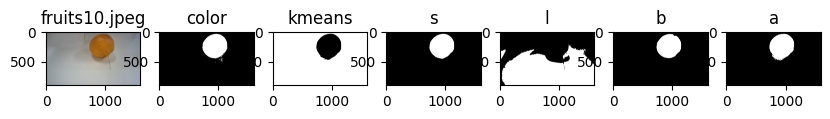

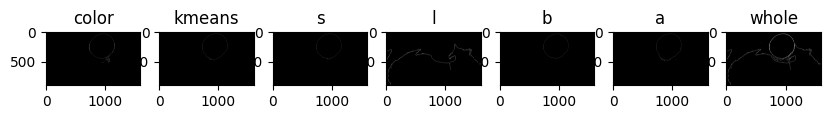

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


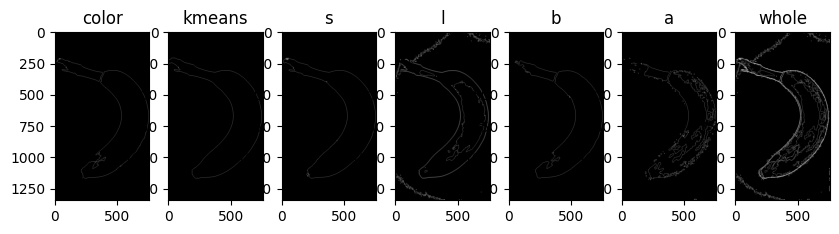

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


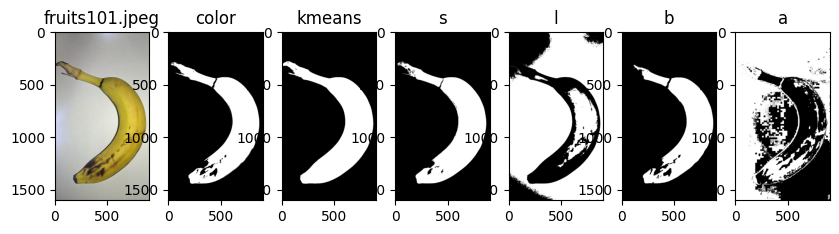

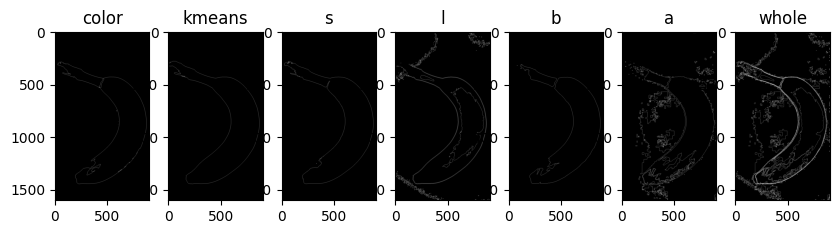

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


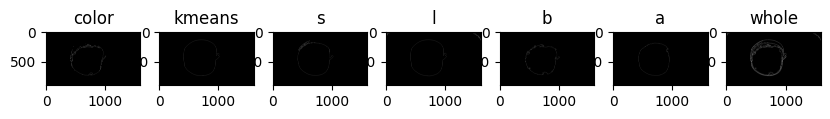

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


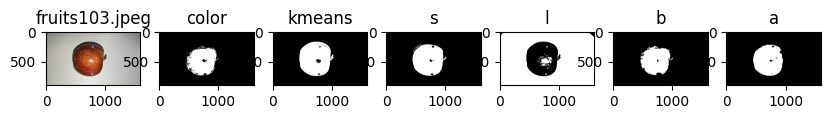

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


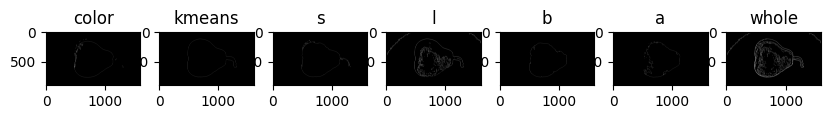

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


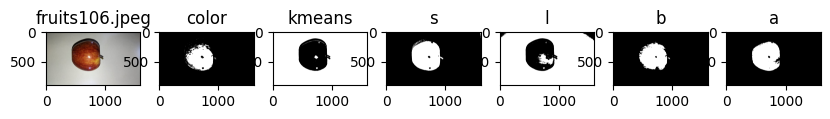

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


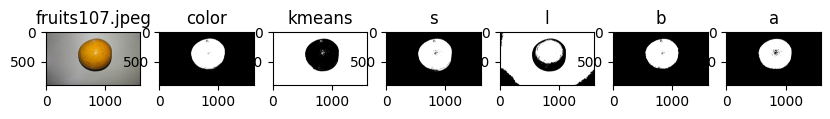

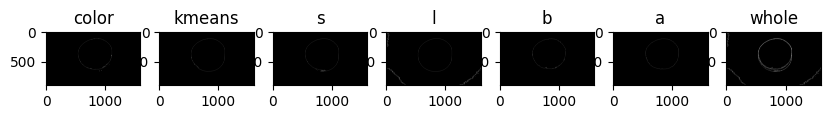

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


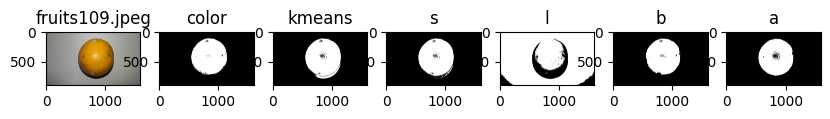

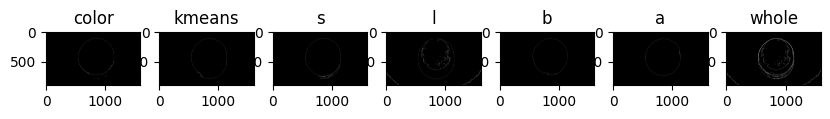

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


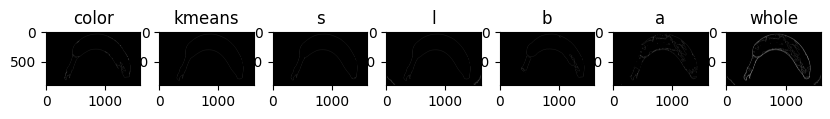

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


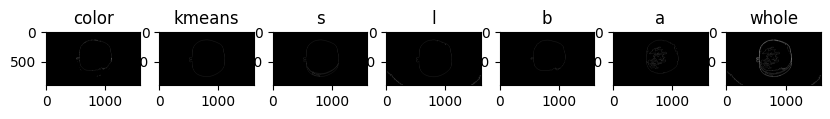

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


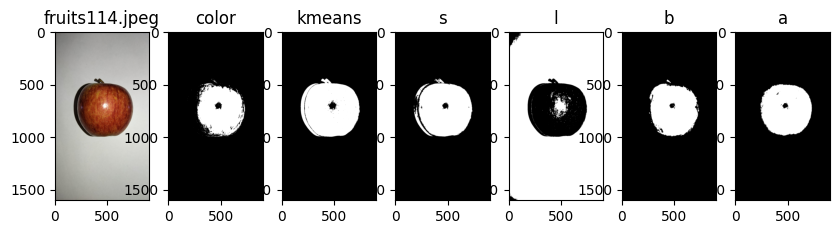

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


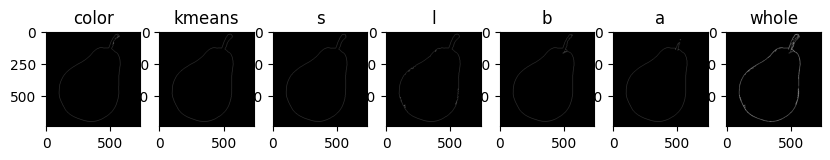

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


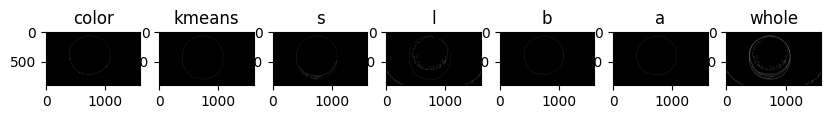

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


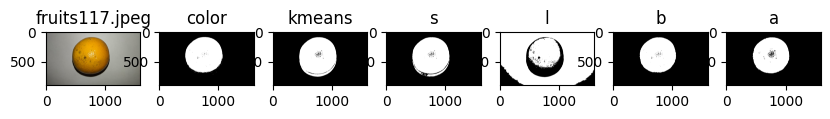

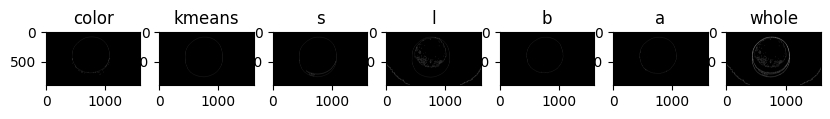

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


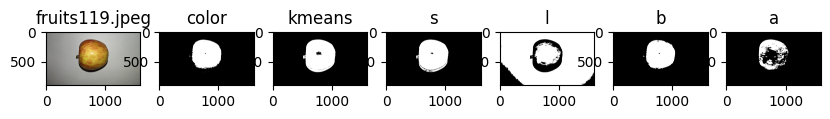

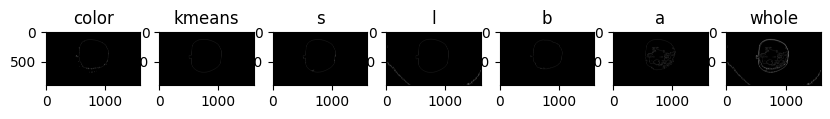

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


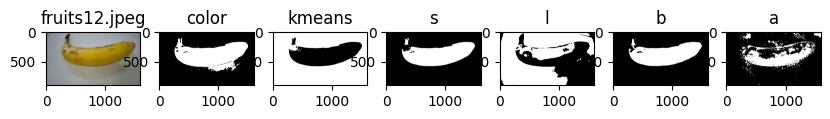

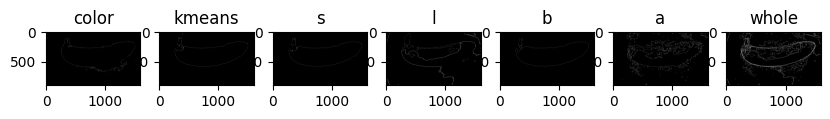

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


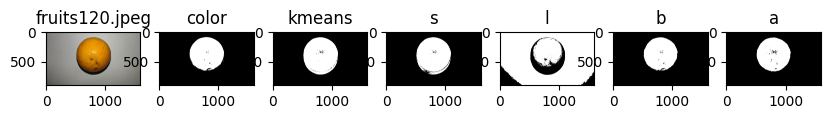

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


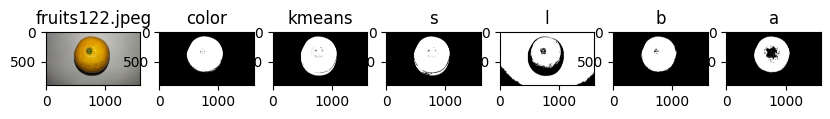

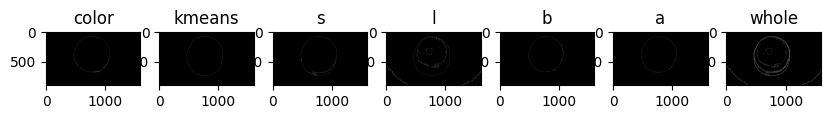

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


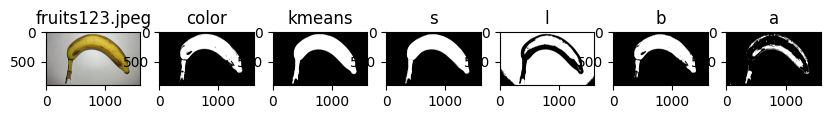

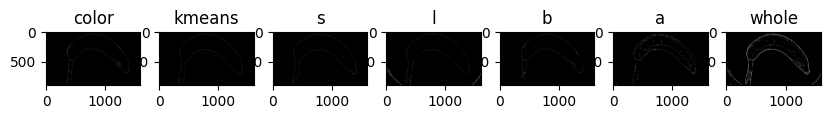

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


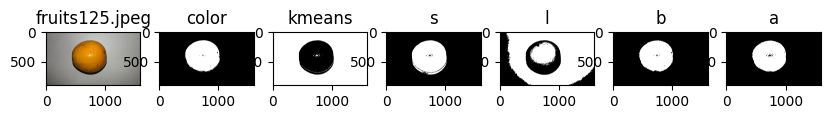

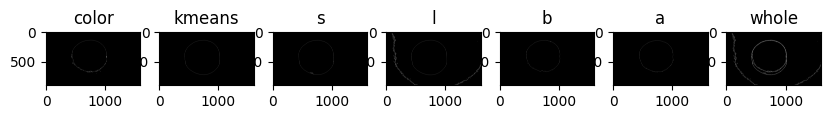

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


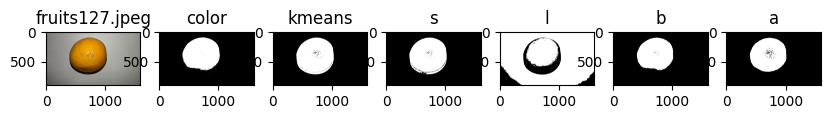

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


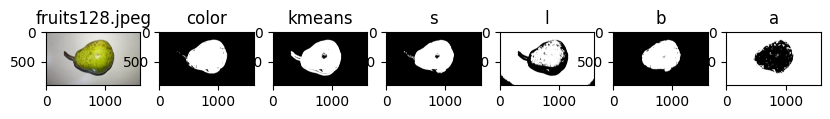

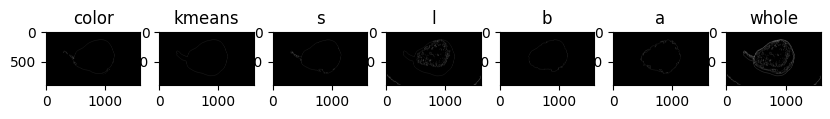

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


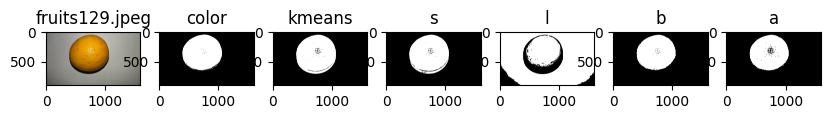

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


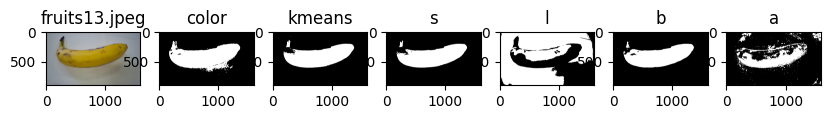

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


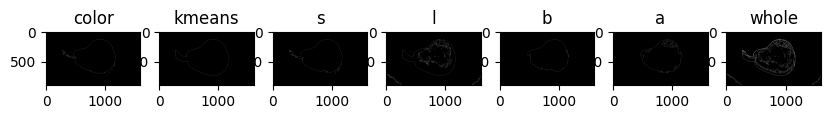

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


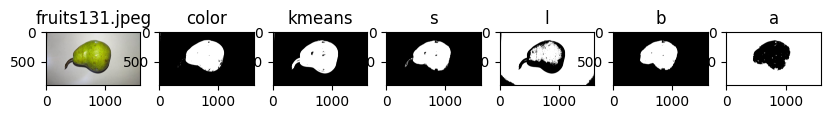

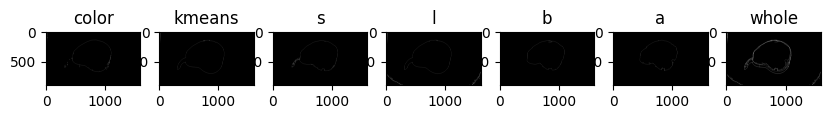

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


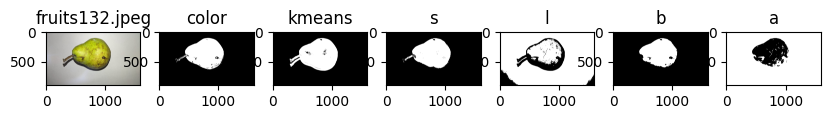

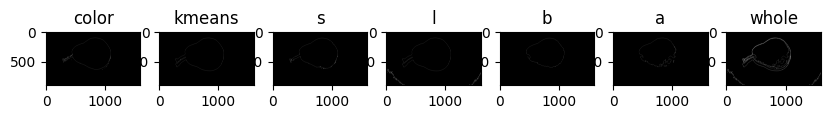

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


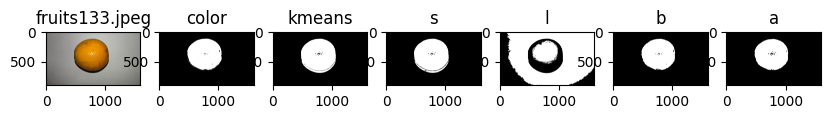

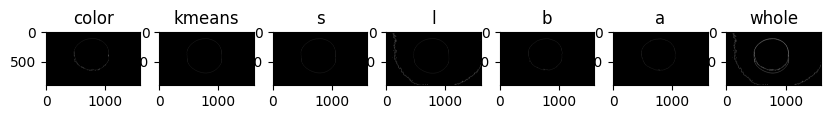

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


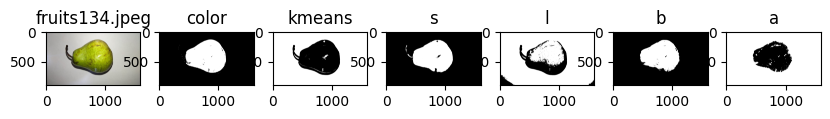

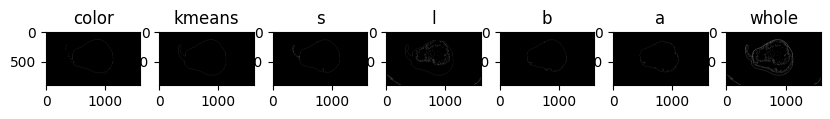

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


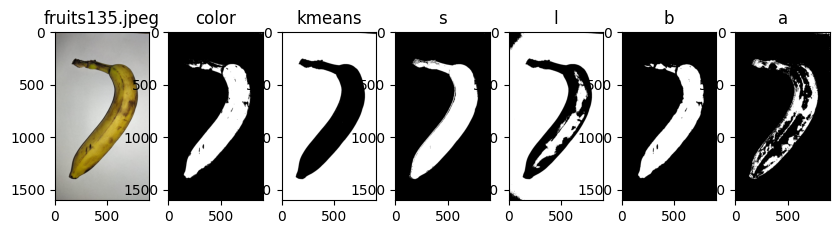

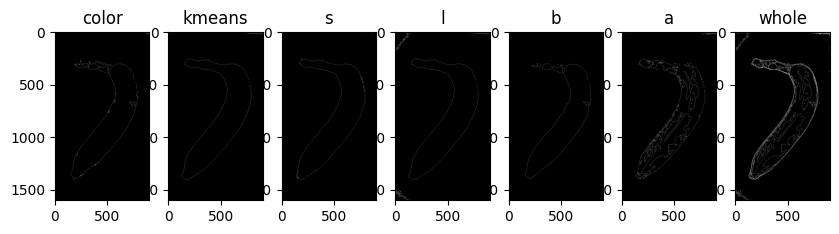

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


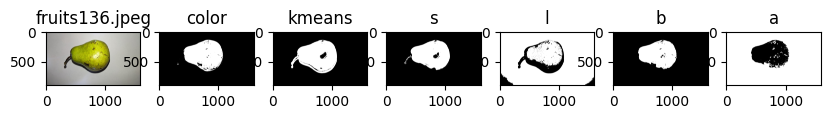

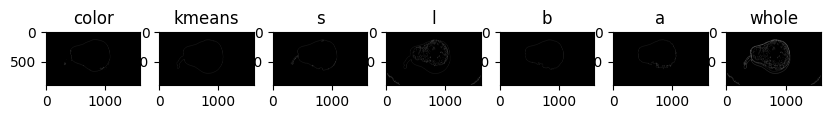

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


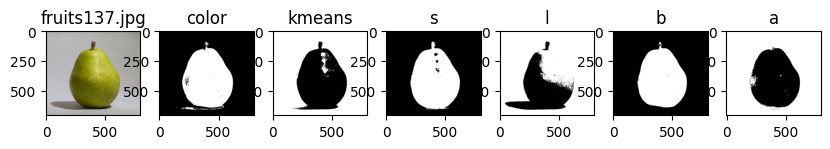

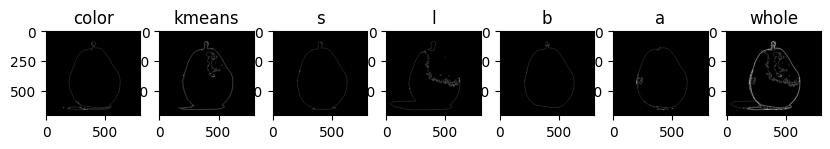

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


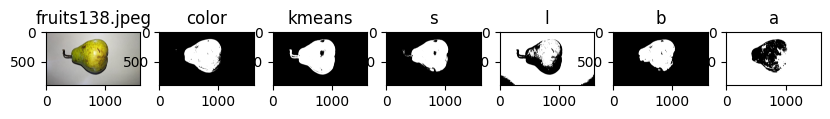

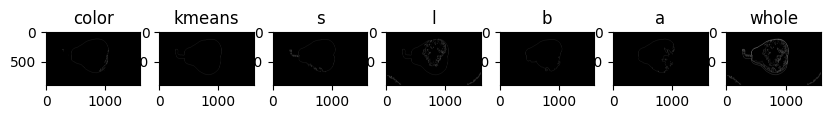

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


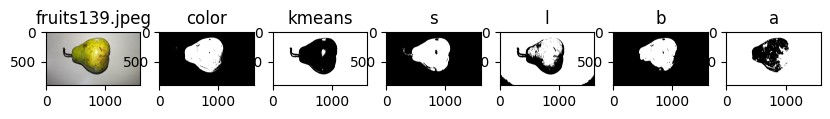

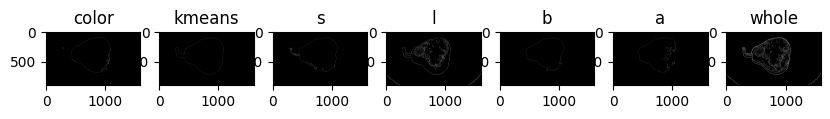

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


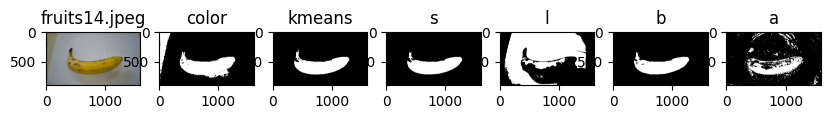

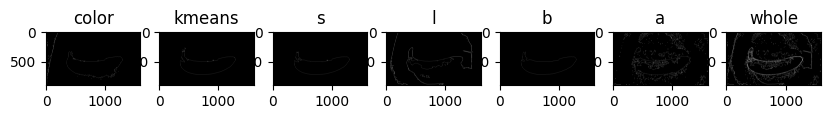

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


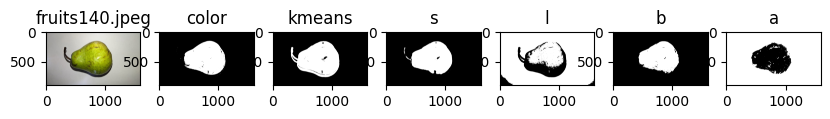

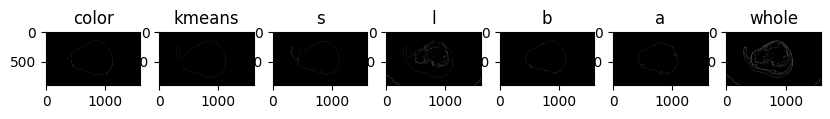

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


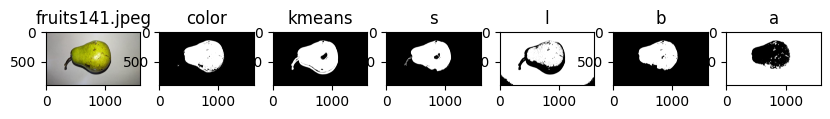

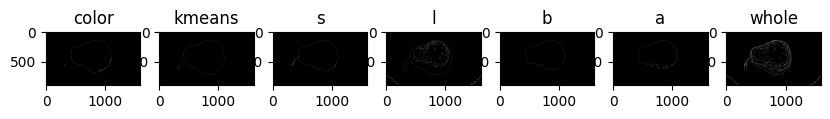

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


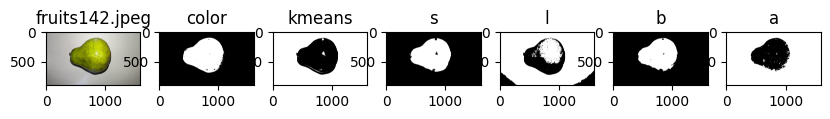

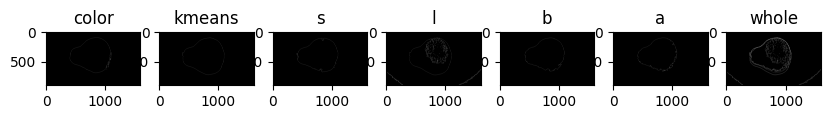

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


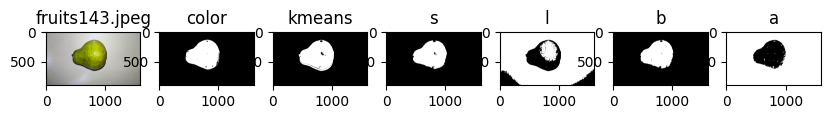

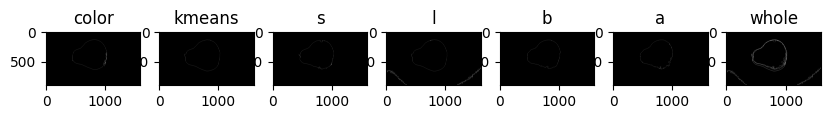

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


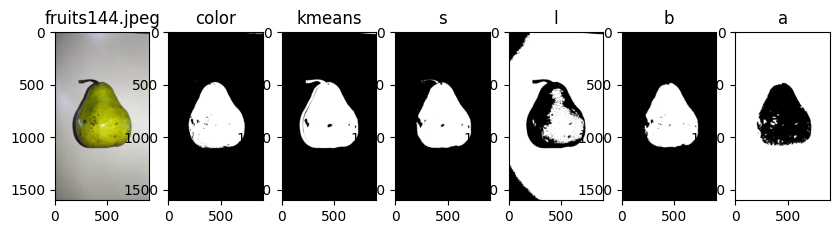

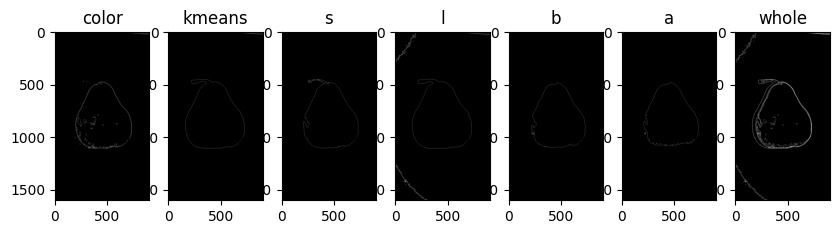

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


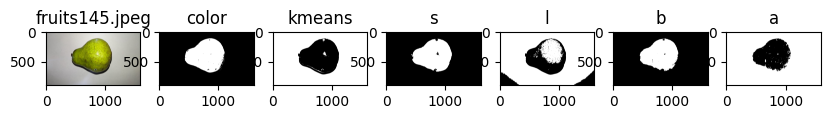

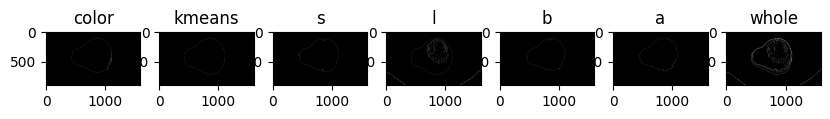

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


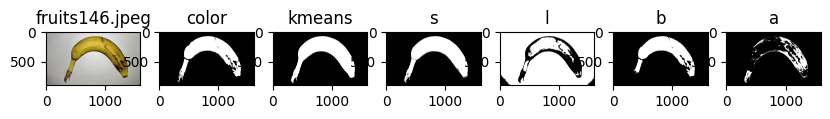

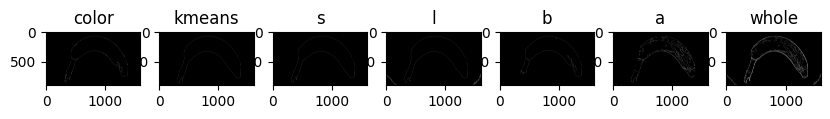

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


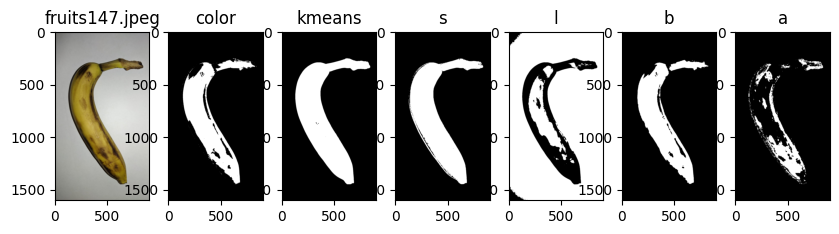

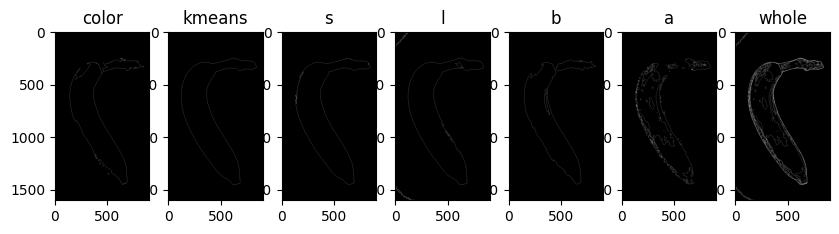

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


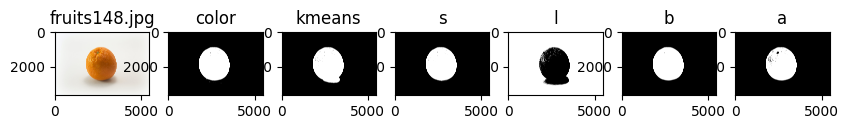

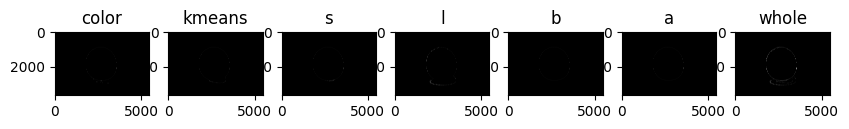

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


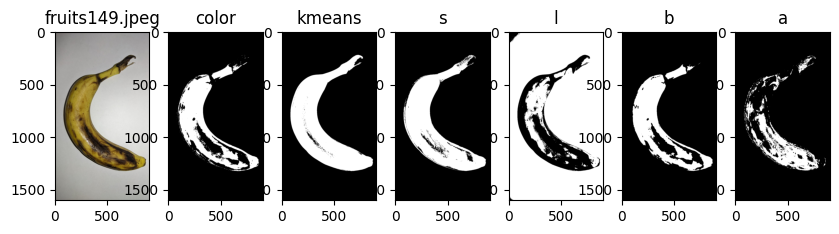

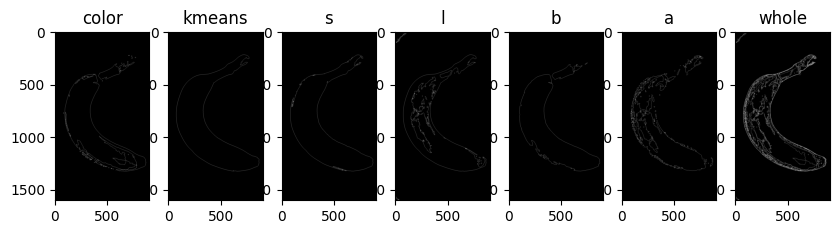

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


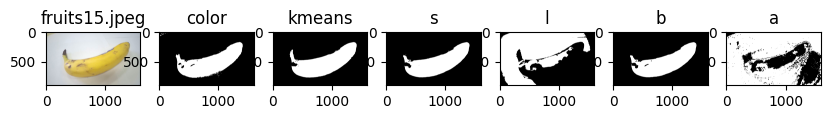

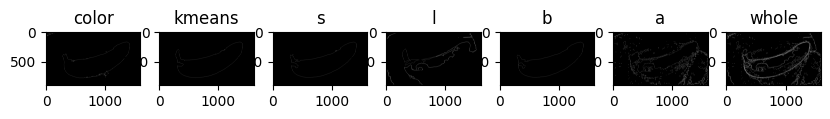

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


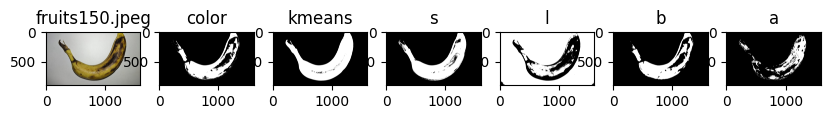

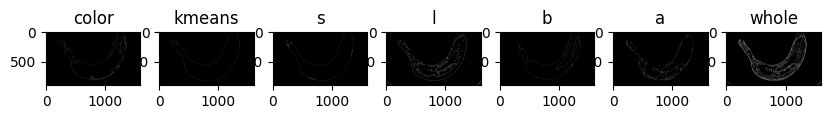

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


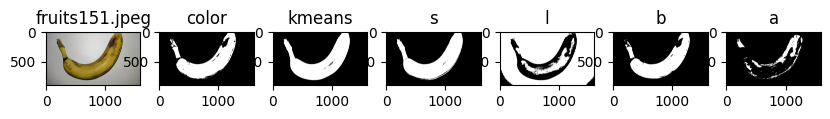

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


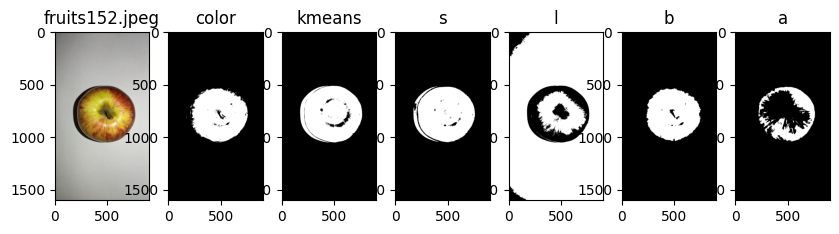

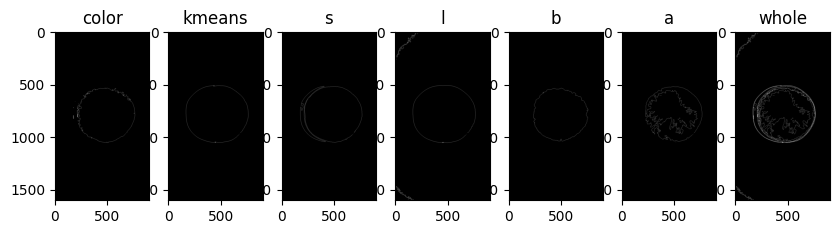

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


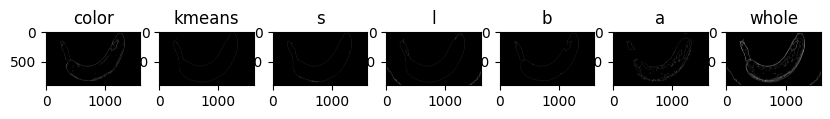

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


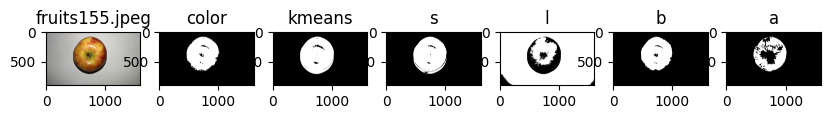

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


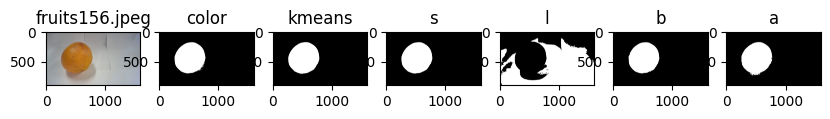

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


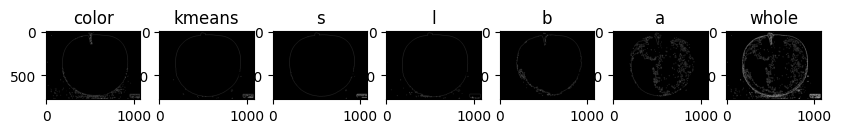

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


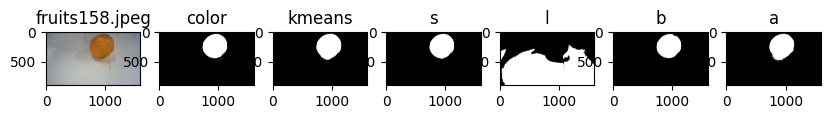

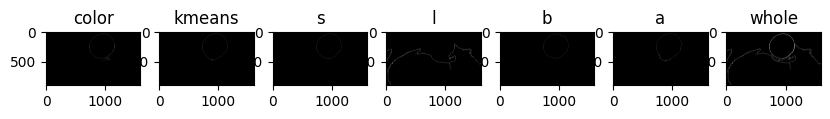

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


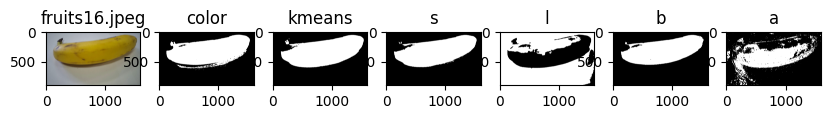

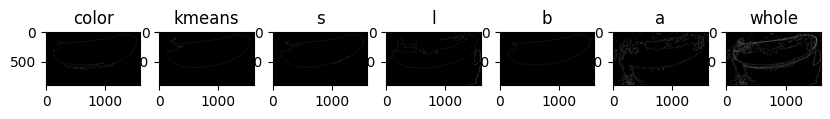

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


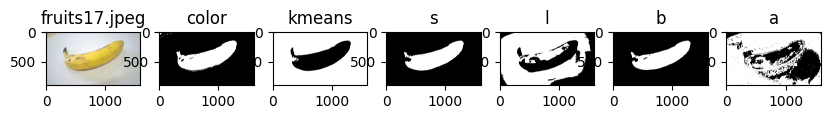

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


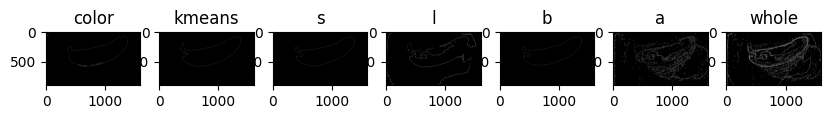

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


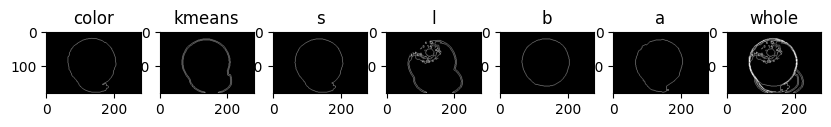

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


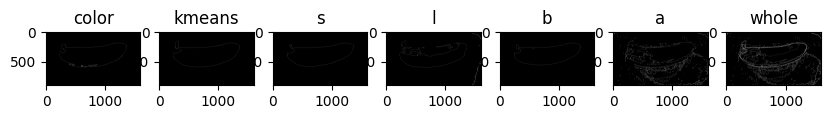

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


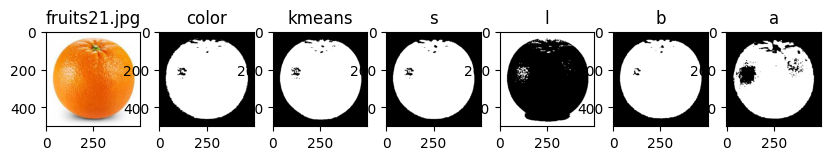

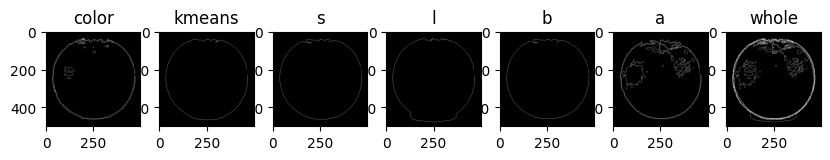

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


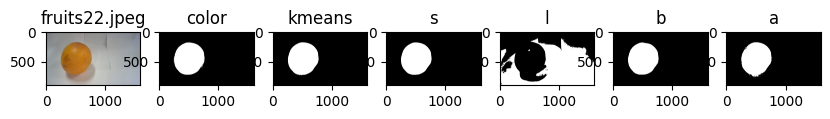

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


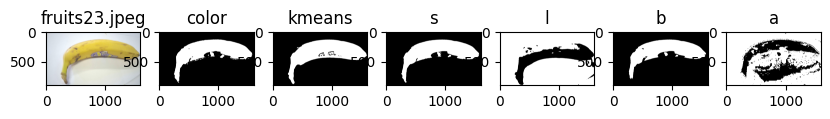

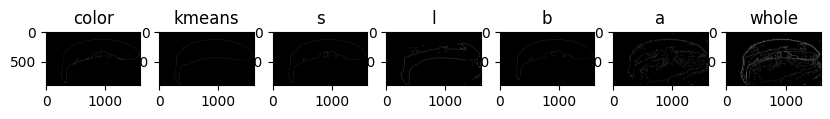

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


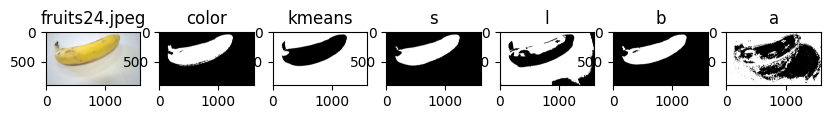

KeyboardInterrupt: 

In [13]:
for file in original:
    image = cv2.imread(file)

    # Convertir la imagen a escala de grises
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask_gray = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    height, width, _ = image.shape
 
    # Crear un vector para almacenar los datos de cada píxel
    data_vector = np.zeros((height * width, 7))  # 3 para RGB, 3 para HSV, 3 para LAB, 1 para escala de grises

    rgb_matrix = image.reshape((-1, 3))
    hsv_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).reshape((-1, 3))
    lab_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2LAB).reshape((-1, 3))
    gray_matrix = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).reshape((-1, 1))

    # Asignar a la matriz de datos
    data_vector[:, :3] = rgb_matrix
    data_vector[:, 3] = hsv_matrix[:, 1]
    data_vector[:, 4:] = lab_matrix
    #data_vector[:, 7] = gray_matrix[:, 0] # conservamos l en lugar de grayscale
    
    kmeans = KMeans(n_clusters=2)  # Puedes ajustar el número de clusters según tus necesidades
    kmeans.fit(data_vector)

    # Obtener las etiquetas de los clusters
    labels = kmeans.labels_

    # Crear una máscara basada en las etiquetas
    mask_kmeans = labels.reshape(height, width)
    mask_kmeans = mask_kmeans.astype(np.uint8) * 255

    # Convertir la imagen de BGR a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #h, s, v = cv2.split(hsv_image)
    _, s, _ = cv2.split(hsv_image)
    #l, a, b = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    l, a, b = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    #_, mask_h = cv2.threshold(h, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #_, mask_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_l = cv2.threshold(l, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_b = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mask_a = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    mask_red    = cv2.inRange(hsv_image, lower_red_1, upper_red_1) | cv2.inRange(hsv_image, lower_red_2, upper_red_2)
    mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
    mask_green  = cv2.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

    # Unir las máscaras
    combined_mask = mask_red | mask_orange | mask_green | mask_yellow

    #contornos
    #color
    sobel_x = cv2.Sobel(combined_mask, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(combined_mask, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, colorWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #kmeans
    sobel_x = cv2.Sobel(mask_kmeans, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_kmeans, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, kmeansWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #gray
    '''sobel_x = cv2.Sobel(mask_gray, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_gray, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)'''

    # Binarizar la imagen con Otsu
    #_, grayWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #h
    '''sobel_x = cv2.Sobel(mask_h, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_h, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, hWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    #s
    sobel_x = cv2.Sobel(mask_s, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_s, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, sWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    '''#v
    sobel_x = cv2.Sobel(mask_v, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_v, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, vWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)'''

    #l
    sobel_x = cv2.Sobel(mask_l, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_l, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, lWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #b
    sobel_x = cv2.Sobel(mask_b, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_b, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, bWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #a
    sobel_x = cv2.Sobel(mask_a, cv2.CV_64F, 1, 0, ksize=9)
    sobel_y = cv2.Sobel(mask_a, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    # Binarizar la imagen con Otsu
    _, aWcnt = cv2.threshold(magnitude, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #Encontrar contornos
    kmeans_cnt, _ = cv2.findContours(kmeansWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color_cnt, _ = cv2.findContours(colorWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #gray_cnt, _ = cv2.findContours(grayWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #h_cnt, _ = cv2.findContours(hWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    s_cnt, _ = cv2.findContours(sWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #v_cnt, _ = cv2.findContours(vWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    l_cnt, _ = cv2.findContours(lWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    b_cnt, _ = cv2.findContours(bWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    a_cnt, _ = cv2.findContours(aWcnt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Dibujar contornos
    #templates
    tcolor = np.zeros((height, width), dtype=np.uint8)
    tkmeans = np.zeros((height, width), dtype=np.uint8)
    #tgray = np.zeros((height, width), dtype=np.uint8)
    #th = np.zeros((height, width), dtype=np.uint8)
    ts = np.zeros((height, width), dtype=np.uint8)
    #tv = np.zeros((height, width), dtype=np.uint8)
    tl = np.zeros((height, width), dtype=np.uint8)
    tb = np.zeros((height, width), dtype=np.uint8)
    ta = np.zeros((height, width), dtype=np.uint8)

    #dibujar
    cv2.drawContours(tcolor, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tkmeans, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tgray, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(th, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(ts, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(tv, v_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tl, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(tb, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(ta, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    #superposición
    whole = np.zeros((height, width), dtype=np.uint8)
    cv2.drawContours(whole, color_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(whole, kmeans_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, gray_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, h_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(whole, s_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    #cv2.drawContours(whole, v_cnt, -1,255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(whole, l_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(whole, b_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno
    cv2.drawContours(whole, a_cnt, -1, 255, 1)  # El último argumento es el grosor del contorno

    #plotting

    plt.figure(figsize =(10,5))
    plt.subplot(1, 7, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(file))
    plt.subplot(1, 7, 2)
    plt.imshow(combined_mask, cmap='gray')
    plt.title('color')
    plt.subplot(1, 7, 3)
    plt.imshow(mask_kmeans, cmap='gray')
    plt.title('kmeans')
    '''plt.subplot(1, 7, 1)
    plt.imshow(mask_gray, cmap='gray')
    plt.title('gray_umbral')'''
    '''plt.subplot(1, 7, 2)
    plt.imshow(mask_h, cmap='gray')
    plt.title('h')'''
    plt.subplot(1, 7, 4)
    plt.imshow(mask_s, cmap='gray')
    plt.title('s')
    '''plt.subplot(1, 7, 4)
    plt.imshow(mask_v, cmap='gray')
    plt.title('v')'''
    plt.subplot(1, 7, 5)
    plt.imshow(mask_l, cmap='gray')
    plt.title('l')
    plt.subplot(1, 7, 6)
    plt.imshow(mask_b, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 7)
    plt.imshow(mask_a, cmap='gray')
    plt.title('a')
    plt.show()

    plt.figure(figsize =(10,5))
    plt.subplot(1, 7, 1)
    plt.imshow(tcolor, cmap='gray')
    plt.title('color')
    plt.subplot(1, 7, 2)
    plt.imshow(tkmeans, cmap='gray')
    plt.title('kmeans')
    '''plt.subplot(1, 10, 3)
    plt.imshow(tgray, cmap='gray')
    plt.title('gray_umbral')'''
    '''plt.subplot(1, 10, 4)
    plt.imshow(th, cmap='gray')
    plt.title('h')'''
    plt.subplot(1, 7, 3)
    plt.imshow(ts, cmap='gray')
    plt.title('s')
    '''plt.subplot(1, 10, 6)
    plt.imshow(tv, cmap='gray')
    plt.title('v')'''
    plt.subplot(1, 7, 4)
    plt.imshow(tl, cmap='gray')
    plt.title('l')
    plt.subplot(1, 7, 5)
    plt.imshow(tb, cmap='gray')
    plt.title('b')
    plt.subplot(1, 7, 6)
    plt.imshow(ta, cmap='gray')
    plt.title('a')
    plt.subplot(1, 7, 7)
    plt.imshow(whole, cmap='gray')
    plt.title('whole')
    plt.show()